# Exercises on NFA and PDA as part of Asgs 4 and 5

* Illustration of PDA
* NFA and RE for fun/insight/novel uses

In [1]:
#----TURN THESE ON IF RUNNING ON JOVE ON COLAB BY REMOVING THE ''' ... '''

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')

from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
'''

#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

import sys
sys.path[0:0] = ['../..' , '../../3rdparty',
                 
                 '../../..' , '../../../3rdparty',
                 
                 '../../../..' , '../../../../3rdparty',
                 
                 ] # Put these at the head of the search path

#---- THESE ARE THE COMMON IMPORTS, WHICHEVER ROUTE YOU TOOK ABOVE

from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.AnimateNFA import *
from jove.Def_PDA    import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

In [2]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



## The EqAB PDA below

In [3]:
# S -> a S b S | b S a S | ''  illustrated

EqAB = md2mc('''PDA

I : '',''; S -> W    !!  PLEASE do understand the PDA input syntax

W : '', S; aSbS -> W !!  PLEASE NOTE HOW WE TYPE A STACK STRING

W : '', S; bSaS -> W !!  NO blanks are allowed in our Sigma 

W : '', S; ''      -> W

W : '', #; #       -> F

W : a,a; '' | b,b;'' -> W

''')

In [15]:
# explore_pda of EqAB on input "abba" below

explore_pda('abba', EqAB)

String abba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abba', '#')
->  ('W', 'abba', 'S#')
->  ('W', 'abba', 'aSbS#')
->  ('W', 'bba', 'SbS#')
->  ('W', 'bba', 'bS#')
->  ('W', 'ba', 'S#')
->  ('W', 'ba', 'bSaS#')
->  ('W', 'a', 'SaS#')
->  ('W', 'a', 'aS#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [16]:
# explore_pda of EqAB on input "abab" below

explore_pda('abab', EqAB)

String abab accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abab', '#')
->  ('W', 'abab', 'S#')
->  ('W', 'abab', 'aSbS#')
->  ('W', 'bab', 'SbS#')
->  ('W', 'bab', 'bS#')
->  ('W', 'ab', 'S#')
->  ('W', 'ab', 'aSbS#')
->  ('W', 'b', 'SbS#')
->  ('W', 'b', 'bS#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abab', '#')
->  ('W', 'abab', 'S#')
->  ('W', 'abab', 'aSbS#')
->  ('W', 'bab', 'SbS#')
->  ('W', 'bab', 'bSaSbS#')
->  ('W', 'ab', 'SaSbS#')
->  ('W', 'ab', 'aSbS#')
->  ('W', 'b', 'SbS#')
->  ('W', 'b', 'bS#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .


## Define the A2B1 PDA below

In [41]:
# A2B1 PDA here!

twoAoneB = md2mc('''PDA

I : '', ''; SS -> W

W : '',  S; aaSbS -> W

W : '',  S; bSaaS -> W

W : '',  S; aSbSa -> W

W : '',  S; '' -> W

W : '',  #; # -> F

W :  a, a; '' | b, b; '' -> W

''')

In [44]:
explore_pda("ababaa", twoAoneB, STKMAX=6)

String ababaa accepted by your PDA in 3 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ababaa', '#')
->  ('W', 'ababaa', 'SS#')
->  ('W', 'ababaa', 'aSbSaS#')
->  ('W', 'babaa', 'SbSaS#')
->  ('W', 'babaa', 'bSaS#')
->  ('W', 'abaa', 'SaS#')
->  ('W', 'abaa', 'aSbSaaS#')
->  ('W', 'baa', 'SbSaaS#')
->  ('W', 'baa', 'bSaaS#')
->  ('W', 'aa', 'SaaS#')
->  ('W', 'aa', 'aaS#')
->  ('W', 'a', 'aS#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ababaa', '#')
->  ('W', 'ababaa', 'SS#')
->  ('W', 'ababaa', 'aSbSaS#')
->  ('W', 'babaa', 'SbSaS#')
->  ('W', 'babaa', 'bSaS#')
->  ('W', 'abaa', 'SaS#')
->  ('W', 'abaa', 'aS#')
->  ('W', 'baa', 'S#')
->  ('W', 'baa', 'bSaaS#')
->  ('W', 'aa', 'SaaS#')
->  ('W', 'aa', 'aaS#')
->  ('W', 'a', 'aS#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'ababaa', '#')
->  ('W

In [51]:
ambiguity_test_pda = md2mc('''PDA
I : '', '';   S -> W
W : '',  S;   1 -> W
W : '',  S;   2 -> W
W : '',  S;   3 -> W
W : '',  S; S+S -> W
W : '',  S; S*S -> W
W : '',  S; (S) -> W
W : '',  #;   # -> F
W : 1, 1; '' | 2, 2; '' | 3, 3; '' | 
    +, +; '' | *, *; '' | (, (; '' | 
       ), ); '' -> W
''')

In [52]:
explore_pda("1+2*3", ambiguity_test_pda)

String 1+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1+2*3', '#')
->  ('W', '1+2*3', 'S#')
->  ('W', '1+2*3', 'S*S#')
->  ('W', '1+2*3', 'S+S*S#')
->  ('W', '1+2*3', '1+S*S#')
->  ('W', '+2*3', '+S*S#')
->  ('W', '2*3', 'S*S#')
->  ('W', '2*3', '2*S#')
->  ('W', '*3', '*S#')
->  ('W', '3', 'S#')
->  ('W', '3', '3#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1+2*3', '#')
->  ('W', '1+2*3', 'S#')
->  ('W', '1+2*3', 'S+S#')
->  ('W', '1+2*3', '1+S#')
->  ('W', '+2*3', '+S#')
->  ('W', '2*3', 'S#')
->  ('W', '2*3', 'S*S#')
->  ('W', '2*3', '2*S#')
->  ('W', '*3', '*S#')
->  ('W', '3', 'S#')
->  ('W', '3', '3#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [56]:
disambiguous_version = md2mc('''PDA
I : '', '';   S -> W
W : '',  T;   1 -> W
W : '',  T;   2 -> W
W : '',  T;   3 -> W
W : '',  S; S+U -> W
W : '',  S;   U -> W
W : '',  U; U*T -> W
W : '',  U;   T -> W
W : '',  T; (S) -> W
W : '',  #;   # -> F
W : 1, 1; '' | 2, 2; '' | 3, 3; '' | 
    +, +; '' | *, *; '' | (, (; '' | 
    ), ); '' -> W
''')

In [57]:
explore_pda("1+2*3", disambiguous_version)

String 1+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1+2*3', '#')
->  ('W', '1+2*3', 'S#')
->  ('W', '1+2*3', 'S+U#')
->  ('W', '1+2*3', 'U+U#')
->  ('W', '1+2*3', 'T+U#')
->  ('W', '1+2*3', '1+U#')
->  ('W', '+2*3', '+U#')
->  ('W', '2*3', 'U#')
->  ('W', '2*3', 'U*T#')
->  ('W', '2*3', 'T*T#')
->  ('W', '2*3', '2*T#')
->  ('W', '*3', '*T#')
->  ('W', '3', 'T#')
->  ('W', '3', '3#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Now for the Kleene Pipeline: RE -> NFA -> DFA -> RE and allied exercises

## First exercise : minimize a DFA via reversal: Brzozowski's algorithm

In [58]:
R = " ( 0 0* 1 + 1)*"

In [59]:
help(re2nfa)

Help on function re2nfa in module jove.Def_RE2NFA:

re2nfa(s, stno=0)
    Given a string s representing an RE and an optional
    state number stno (default 0), generate an NFA that
    is language equivalent to the RE



In [61]:
N_R = re2nfa(R)

Generating LALR tables


In [62]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [63]:
D_R = nfa2dfa(N_R)

In [64]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct')
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    The top-level callable DFA minimizer.
    Given a DFA D, go through the state minimization algorithm.
    state_name_mode is 'verbose' or 'succinct', producing two 
    variants, as you can guess.
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. Else we keep the name of the representative of 
    eqch equivalence class.



In [65]:
MD_R = min_dfa(D_R)

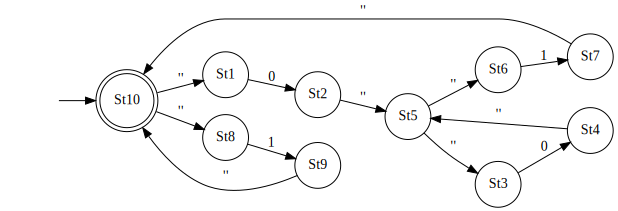

In [66]:
dotObj_nfa(N_R) # View this NFA

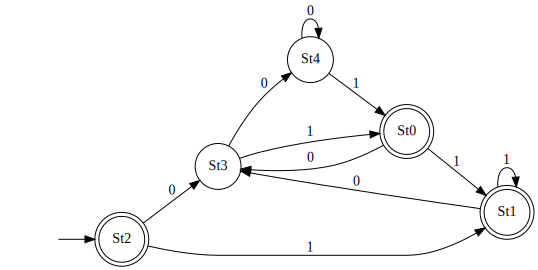

In [67]:
dotObj_dfa(D_R) # View this DFA

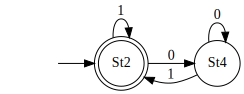

In [68]:
dotObj_dfa(MD_R) # View this min DFA

In [69]:
MD_R # View the minimized DFA

{'Q': {'St2', 'St4'},
 'Sigma': {'0', '1'},
 'Delta': {('St2', '1'): 'St2',
  ('St2', '0'): 'St4',
  ('St4', '1'): 'St2',
  ('St4', '0'): 'St4'},
 'q0': 'St2',
 'F': {'St2'}}

In [70]:
dfa2nfa(MD_R) # This command obtains the "NFA of a DFA". Note the differences internally!

{'Q': {'St2', 'St4'},
 'Sigma': {'0', '1'},
 'Delta': {('St2', '1'): {'St2'},
  ('St2', '0'): {'St4'},
  ('St4', '1'): {'St2'},
  ('St4', '0'): {'St4'}},
 'Q0': {'St2'},
 'F': {'St2'}}

## There is a question on the result of dfa2nfa in the assignment.

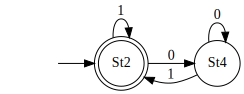

In [71]:
dotObj_nfa(dfa2nfa(MD_R))

# Brzozowski's minimization begins here

In [72]:
rev_R = rev_dfa( D_R )

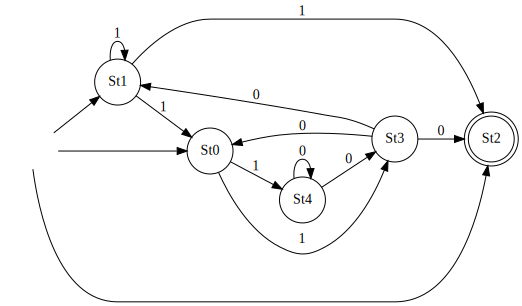

In [73]:
dotObj_nfa ( rev_R )

In [74]:
det_rev_R = nfa2dfa( rev_R )

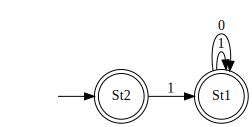

In [75]:
dotObj_dfa( det_rev_R )

In [76]:
rev_det_rev_R = rev_dfa( det_rev_R )

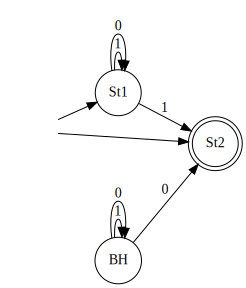

In [77]:
dotObj_nfa( rev_det_rev_R )

In [78]:
det_rev_det_rev_R = nfa2dfa( rev_det_rev_R )

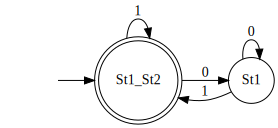

In [79]:
dotObj_dfa( det_rev_det_rev_R )

In [80]:
# Now define Brzozowski's minimizer in a few lines of Python. It is available as min_dfa_brz
help(min_dfa_brz)

Help on function min_dfa_brz in module jove.Def_NFA:

min_dfa_brz(D)
    Minimize a DFA as per Brzozowski's algorithm.



In [81]:
# Without peeking at the definition of min_dfa_brz, provide a Python function that defines it. 
# Call it my_min_dfa_brz as prototyped below

def my_min_dfa_brz(D):
    """ Given a consistent DFA D, return a fully minimized DFA Dmin that has the same language."""
    
    return nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(D))))


In [83]:
new_MD_R = my_min_dfa_brz(D_R)

In [84]:
iso_dfa( new_MD_R,  det_rev_det_rev_R )

True

# Brzozowski's minimization ends here

In [85]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [86]:
help(dfa2nfa)

Help on function dfa2nfa in module jove.Def_NFA2RE:

dfa2nfa(D)
    Given a DFA D, make a language-equivalent NFA.



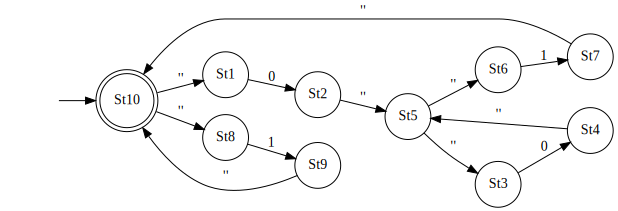

In [87]:
dotObj_nfa(N_R)

# Carry out NFA to RE conversion

Make a GNFA out of N_R, view it, and then delete its states

In [88]:
help(mk_gnfa)

Help on function mk_gnfa in module jove.Def_NFA2RE:

mk_gnfa(Nin)
    Input : Nin, an NFA.
    Output: G, a GNFA, with at-most one transition from any
            state p to a state q.??true any more?? Note that we have created
            an NFA (G+NFA), and so one state can have a transition
            to A SET OF STATES !!
    Method: Add a new set of states {Real_I} and another, {Real_F}.
            Move from state Real_I to the NFA's initial set of states
            upon epsilon, and from each state in NFA's F to Real_F.
            Return this GNFA.
            We will keep GNFA's alphabet implicit (whatever edge
            labels exist will be deemed to be in the alphabet.)



In [89]:
Gnfa_N_R = mk_gnfa(N_R)

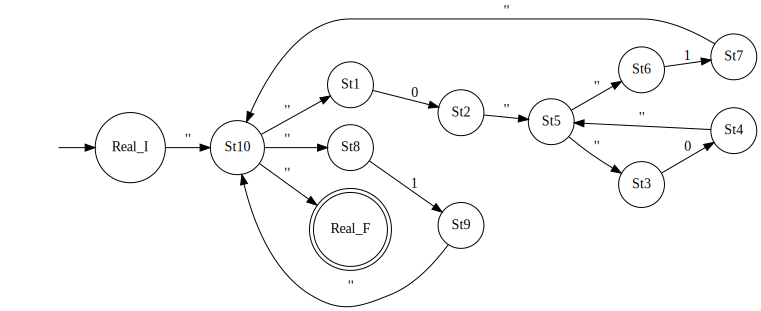

In [90]:
dotObj_gnfa(Gnfa_N_R)

In [149]:
(Gfinal_1, DO_list_1, final_RE_1) = del_gnfa_states(Gnfa_N_R)

**** Eliminating state St4 ****
**** Eliminating state St5 ****
**** Eliminating state St3 ****
**** Eliminating state St6 ****
**** Eliminating state St1 ****
**** Eliminating state St8 ****
**** Eliminating state St7 ****
**** Eliminating state St2 ****
**** Eliminating state St10 ****
**** Eliminating state St9 ****


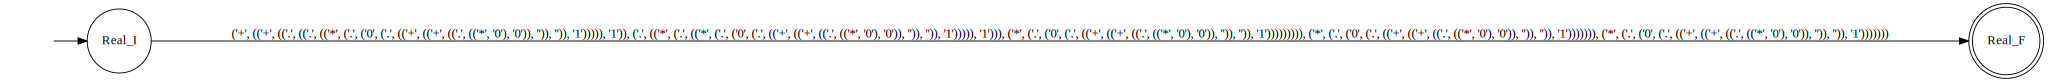

In [150]:
dotObj_gnfa(Gfinal_1)

## View the finally generated RE and the intermediate GNFA

This helps you understand how the conversion goes

In [151]:
final_RE_1

'((((((0 (((((0)* 0) + "") + "") 1)))* 1) (((((0 (((((0)* 0) + "") + "") 1)))* 1))* ((0 (((((0)* 0) + "") + "") 1)))*)) + ((0 (((((0)* 0) + "") + "") 1)))*) + ((0 (((((0)* 0) + "") + "") 1)))*)'

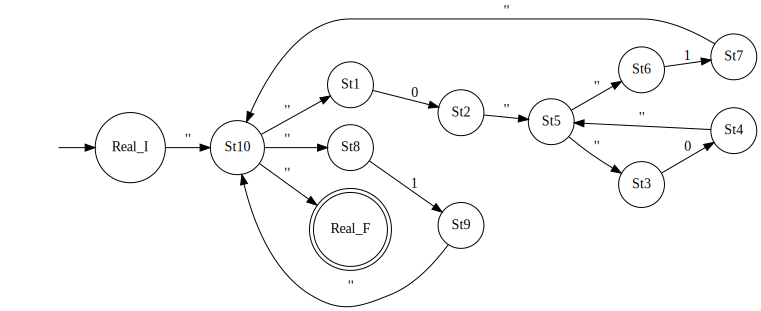

In [152]:
DO_list_1[0]

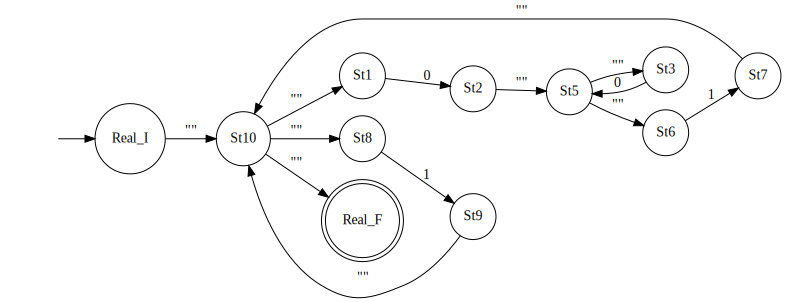

In [153]:
DO_list_1[1]

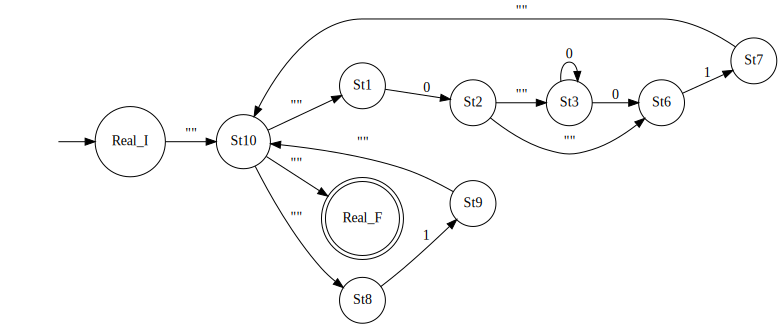

In [154]:
DO_list_1[2]

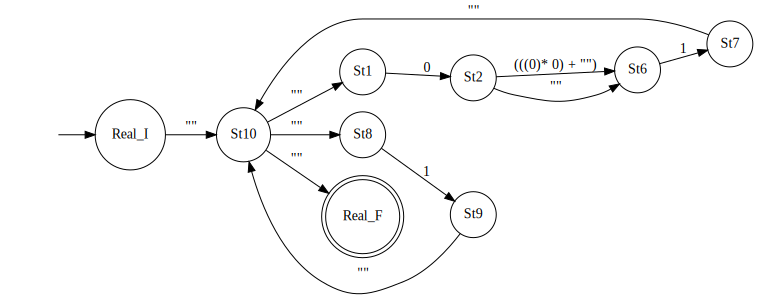

In [155]:
DO_list_1[3]

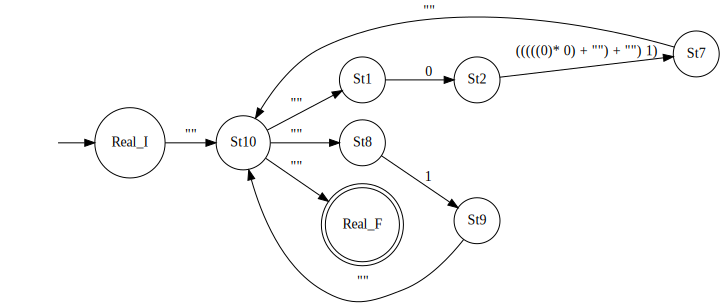

In [156]:
DO_list_1[4]

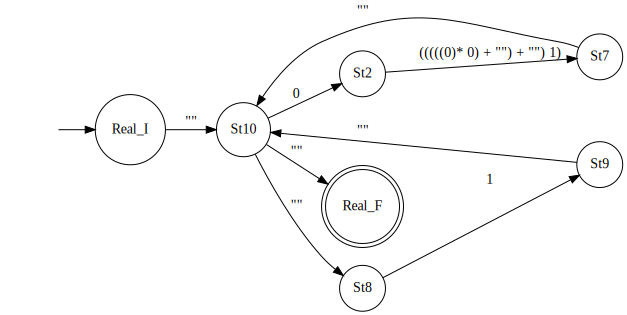

In [157]:
DO_list_1[5]

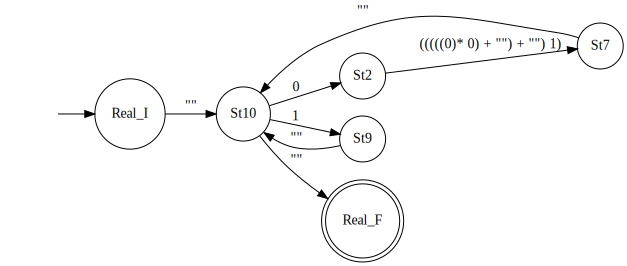

In [158]:
DO_list_1[6]

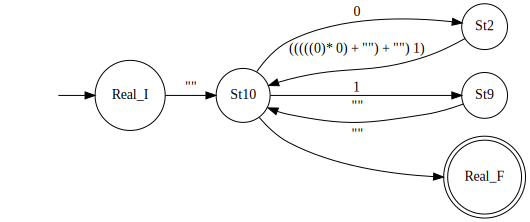

In [159]:
DO_list_1[7]

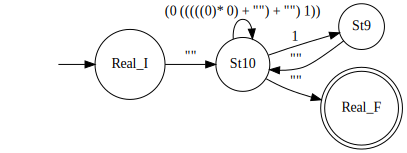

In [160]:
DO_list_1[8]

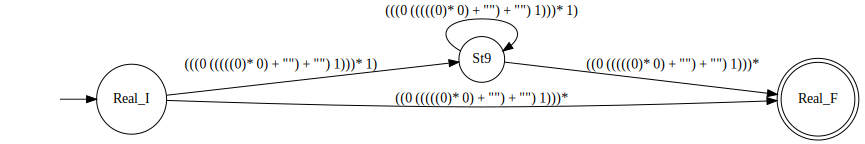

In [161]:
DO_list_1[9]

In [162]:
final_RE_1

'((((((0 (((((0)* 0) + "") + "") 1)))* 1) (((((0 (((((0)* 0) + "") + "") 1)))* 1))* ((0 (((((0)* 0) + "") + "") 1)))*)) + ((0 (((((0)* 0) + "") + "") 1)))*) + ((0 (((((0)* 0) + "") + "") 1)))*)'

## If you insert the final RE back and convert, you should get the same minimized DFA

This "checks the work" and shows that the Kleene pipeline is a ring: "anything can be converted to anything" where "anything" includes an RE, an NFA, or a DFA


In [163]:
fre_dfa_sd1 = min_dfa(nfa2dfa(re2nfa(final_RE_1)))

Generating LALR tables


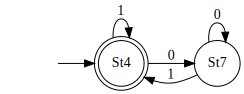

In [164]:
dotObj_dfa(fre_dfa_sd1)

## If you control the state deletion order, a different RE results, but for the same language

In [165]:
(Gfinal_2, DO_list_2, final_RE_2) = del_gnfa_states(Gnfa_N_R, ["St1", "St2", "St3", "St4", "St5", "St6", "St7", "St8", "St9", "St10"])

**** Eliminating state St1 ****
**** Eliminating state St2 ****
**** Eliminating state St3 ****
**** Eliminating state St4 ****
**** Eliminating state St5 ****
**** Eliminating state St6 ****
**** Eliminating state St7 ****
**** Eliminating state St8 ****
**** Eliminating state St9 ****
**** Eliminating state St10 ****


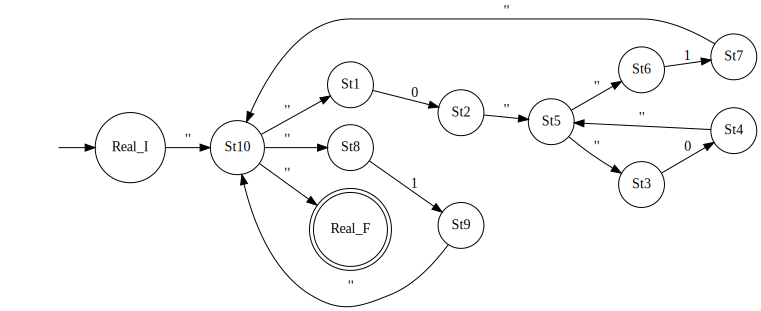

In [166]:
DO_list_2[0]

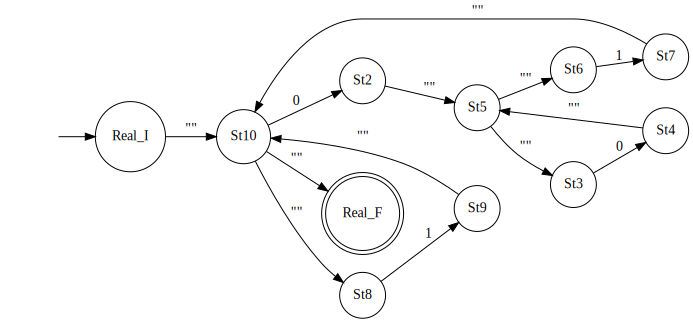

In [167]:
DO_list_2[1]

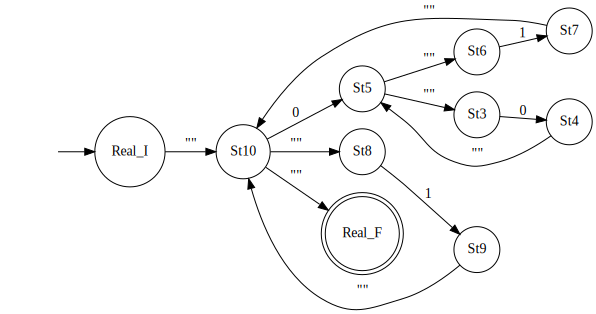

In [168]:
DO_list_2[2]

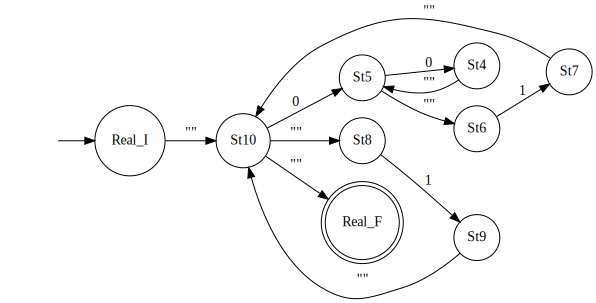

In [169]:
DO_list_2[3]

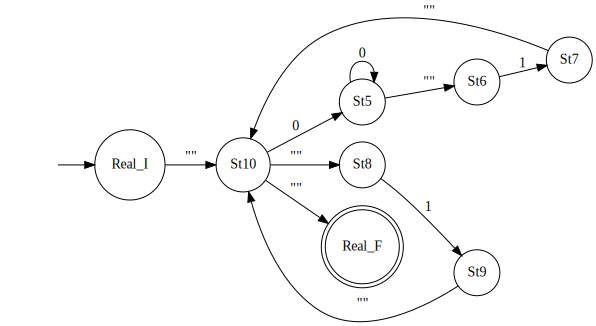

In [170]:
DO_list_2[4]

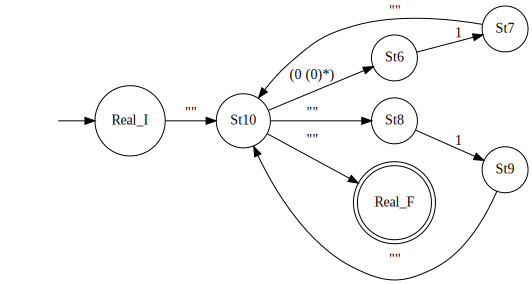

In [171]:
DO_list_2[5]

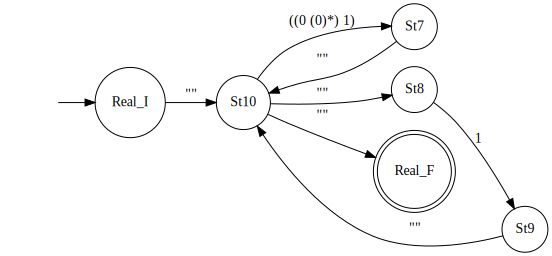

In [172]:
DO_list_2[6]

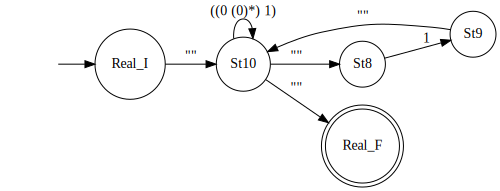

In [173]:
DO_list_2[7]

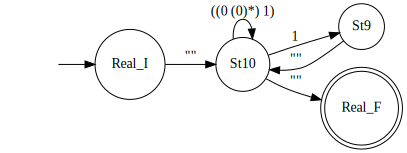

In [174]:
DO_list_2[8]

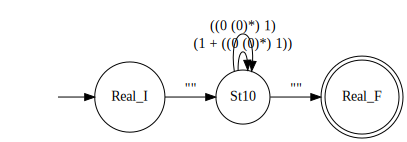

In [175]:
DO_list_2[9]

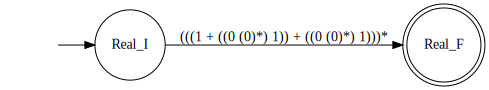

In [176]:
DO_list_2[10]

In [177]:
# Display DO_list entries and the final_RE here!

final_RE_2

'(((1 + ((0 (0)*) 1)) + ((0 (0)*) 1)))*'

In [178]:
fre_dfa_sd2 = min_dfa(nfa2dfa(re2nfa(final_RE_2)))

Generating LALR tables


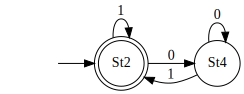

In [179]:
dotObj_dfa(fre_dfa_sd2)

In [180]:
iso_dfa(fre_dfa_sd1, fre_dfa_sd2)

True

# Postage-stamp problems

Now you'll study postage-stamp problems using RE and minimal DFA
Modify the cells below as needed.

In [181]:
stampsRE = "(11111+1111111)*"

In [182]:
N_stampsRE = re2nfa(stampsRE)

Generating LALR tables


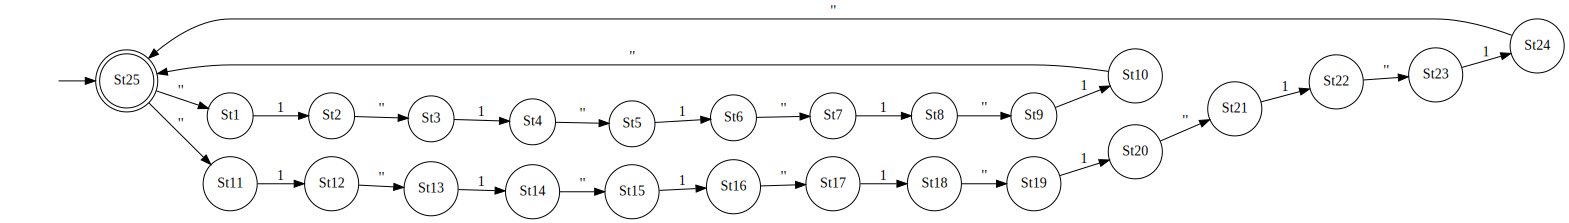

In [183]:
dotObj_nfa( N_stampsRE )

In [184]:
D_stampsRE = nfa2dfa( N_stampsRE )

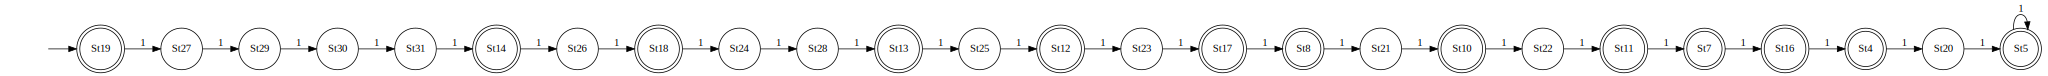

In [185]:
dotObj_dfa(min_dfa(D_stampsRE))

## Now read out the answer from the above min DFA as in the book

In [186]:
sylv_5_7 = min_dfa(nfa2dfa(re2nfa(stampsRE)))

Generating LALR tables


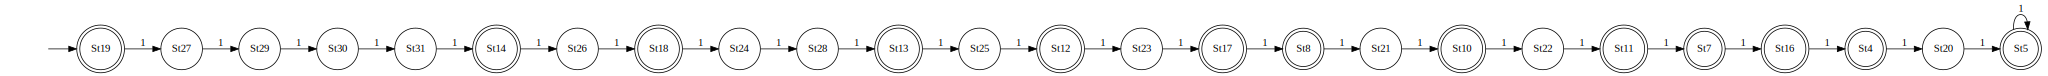

In [187]:
dotObj_dfa(sylv_5_7)

In [191]:
stampsRE2 = "(11111+1111111111)*"

In [192]:
sylv_5_10 = min_dfa(nfa2dfa(re2nfa(stampsRE2)))

Generating LALR tables


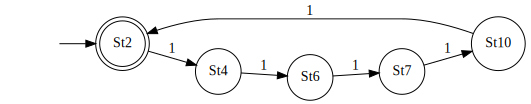

In [193]:
dotObj_dfa(sylv_5_10)

In [194]:
stampsRE3 = "(11111+1111111+11111111111)*"

In [195]:
sylv_5_7_11 = min_dfa(nfa2dfa(re2nfa(stampsRE3)))

Generating LALR tables


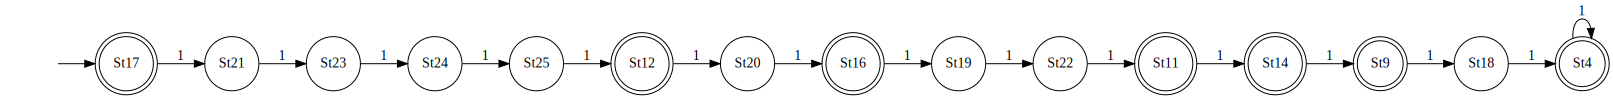

In [196]:
dotObj_dfa(sylv_5_7_11)